# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Naufal Ilman
- **Email:** mnaufalilman@gmail.com
- **ID Dicoding:** nopal_ilman

## Pertanyaan Bisnis

- Bagaimana Pengaruh Cuaca terhadap terhadap jumlah rata-rata persewaan sepeda? Jika terdapat pengaruh, rata-rata penyewa sepeda menyewa pada cuaca apa?

- Rata-rata penyewa sepeda menyewa sepeda pada jam berapa?

## Import Library

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Data Gathering

In [74]:
#data hour
data_hour = pd.read_csv("Data/hour.csv")
data_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [75]:
#data day
data_day = pd.read_csv("Data/day.csv")
data_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Acessing Data

##### Data Hour

**1. Melakukan pengecekan tipe data apakah tipe data sudah benar atau tidak**

In [76]:
#cek tipe data hour
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


terlihat bahwa terdapat kesalahan tipe pada variabel dteday (object >> datetime), season, mnth, weekday, dan weathersit juga akan saya rubah menjadi tipe kategori.

**2. Cek Duplikasi data**

In [77]:
print("Jumlah duplikasi: ", data_hour.duplicated().sum())

Jumlah duplikasi:  0


tidak terdapat duplikasi pada data

**3. Analisis Deskriptif Pada Data**

In [78]:
#Analisis Deskriptif pada data
data_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


##### Data Day

**1. Melakukan pengecekan tipe data apakah tipe data sudah benar atau tidak**

In [79]:
#cek tipe data day
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


terlihat bahwa terdapat kesalahan tipe pada variabel dteday (object >> datetime), season, mnth, weekday, dan weathersit juga akan saya rubah menjadi tipe kategori.

**2. Cek Duplikasi data**

In [80]:
print("Jumlah duplikasi: ", data_day.duplicated().sum())

Jumlah duplikasi:  0


tidak terdapat duplikasi pada data

**3. Analisis Deskriptif Pada Data**

In [81]:
#Analisis Deskriptif pada data
data_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

##### Data Hour

In [82]:
#cek missing value
data_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

tidak terdapat adanya missing value (data hilang) pada data hour

In [84]:
#Mengubah isi variabel season menjadi (1:springer, 2:summer, 3:fall, 4:winter)
data_hour['season'] = data_hour['season'].replace({1:"springer", 2:"summer", 3:"fall", 4:"winter"})

#Mengubah isi variabel yr menjadi (0: 2011, 1:2012)
data_hour['yr'] = data_hour['yr'].replace({0:2011, 1:2012})

#mengubah isi variabel month menjadi (1:Januari, 2:Februari, 3:Maret, 4:April, 5:Mei, 6:Juni, 7:Juli, 8:Agustus, 9:September, 10:Oktober, 11:Nopember, 12:Desember)
data_hour['mnth'] = data_hour['mnth'].replace({1:"Januari", 2:"Februari", 3:"Maret", 4:"April", 5:"Mei", 6:"Juni", 7:"Juli", 8:"Agustus", 9:"September", 10:"Oktober", 11:"Nopember", 12:"Desember"})

#Mengubah isi variabel weekday menjadi (0:Minggu, 1:Senin, 2:Selasa, 3:Rabu, 4: Kamis, 5:Jumat, 6:Sabtu)
data_hour['weekday'] = data_hour['weekday'].replace({0:"Minggu", 1:"Senin", 2:"Selasa", 3:"Rabu", 4: "Kamis", 5:"Jumat", 6:"Sabtu"})

#Mengubah isi variabel weathersit menjadi (1:clear/partly cloudy, 2:mist cloudy, 3:light snow/light rain, 4:extreme weather)
data_hour['weathersit'] = data_hour['weathersit'].replace({1:"clear/partly cloudy", 2:"mist cloudy", 3:"light snow/light rain", 4:"extreme weather"})

data_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,2011,Januari,0,0,Sabtu,0,clear/partly cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,2011,Januari,1,0,Sabtu,0,clear/partly cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,2011,Januari,2,0,Sabtu,0,clear/partly cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,2011,Januari,3,0,Sabtu,0,clear/partly cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,2011,Januari,4,0,Sabtu,0,clear/partly cloudy,0.24,0.2879,0.75,0.0,0,1,1


In [85]:
#Mengubah tipe data dteday ke datetime
data_hour['dteday'] = pd.to_datetime(data_hour.dteday)

#Mengubah tipe data season, yr, mnth, hr, weekday, weathersit ke category
data_hour['season'] = data_hour['season'].astype('category')
data_hour['yr'] = data_hour['yr'].astype('category')
data_hour['mnth'] = data_hour['mnth'].astype('category')
data_hour['weekday'] = data_hour['weekday'].astype('category')
data_hour['weathersit'] = data_hour['weathersit'].astype('category')

In [86]:
#cek tipe data
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

##### Data Day

In [87]:
#cek missing value
data_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

tidak terdapat adanya missing value (data hilang) pada data day

In [96]:
#Mengubah isi variabel season menjadi (1:springer, 2:summer, 3:fall, 4:winter)
data_day['season'] = data_day['season'].replace({1:"springer", 2:"summer", 3:"fall", 4:"winter"})

#Mengubah isi variabel yr menjadi (0: 2011, 1:2012)
data_day['yr'] = data_day['yr'].replace({0:2011, 1:2012})

#mengubah isi variabel month menjadi (1:Januari, 2:Februari, 3:Maret, 4:April, 5:Mei, 6:Juni, 7:Juli, 8:Agustus, 9:September, 10:Oktober, 11:Nopember, 12:Desember)
data_day['mnth'] = data_day['mnth'].replace({1:"Januari", 2:"Februari", 3:"Maret", 4:"April", 5:"Mei", 6:"Juni", 7:"Juli", 8:"Agustus", 9:"September", 10:"Oktober", 11:"Nopember", 12:"Desember"})

#Mengubah isi variabel weekday menjadi (0:Minggu, 1:Senin, 2:Selasa, 3:Rabu, 4: Kamis, 5:Jumat, 6:Sabtu)
data_day['weekday'] = data_day['weekday'].replace({0:"Minggu", 1:"Senin", 2:"Selasa", 3:"Rabu", 4: "Kamis", 5:"Jumat", 6:"Sabtu"})

#Mengubah isi variabel weathersit menjadi (1:clear/partly cloudy, 2:mist cloudy, 3:light snow/light rain, 4:extreme weather)
data_day['weathersit'] = data_day['weathersit'].replace({1:"clear/partly cloudy", 2:"mist cloudy", 3:"light snow/light rain", 4:"extreme weather"})

data_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,2011,Januari,0,Sabtu,0,mist cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,Januari,0,Minggu,0,mist cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,Januari,0,Senin,1,clear/partly cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,Januari,0,Selasa,1,clear/partly cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,Januari,0,Rabu,1,clear/partly cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## EDA (Exploratory Data Analysis)

**Menggunakan Data Day**

In [97]:
#statistika deskriptif secara keseluruhan
data_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,NaN,12,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,fall,NaN,Januari,NaN,Sabtu,NaN,clear/partly cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,NaN,62,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,2011.500684,NaN,0.028728,NaN,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,0.500342,NaN,0.167155,NaN,0.465233,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,2011.000000,NaN,0.000000,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,2011.000000,NaN,0.000000,NaN,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,NaN,2012.000000,NaN,0.000000,NaN,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,NaN,2012.000000,NaN,0.000000,NaN,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [98]:
#Mengelompokkan penyewa sepeda (registered dan casual) berdasarkan musim
data_day.groupby(by="season").agg({
    "cnt": ["max", "min", "mean", "std"]
})

cnt                                
           max   min         mean          std
season                                        
fall      8714  1115  5644.303191  1459.800381
springer  7836   431  2604.132597  1399.942119
summer    8362   795  4992.331522  1695.977235
winter    8555    22  4728.162921  1699.615261

Berdasarkan tabel diatas, terlihat bahwa musim gugur memiliki rata rata tertinggi jumlah penyewa sepeda per harinya, diikuti dengan musim panas, musim dingin, dan musim semi

In [99]:
#Mengelompokkan penyewa sepeda (registered dan casual) berdasarkan bulan
data_day.groupby(by="mnth").agg({
    "cnt": ["max", "min", "mean", "std"]
})

cnt                                
            max   min         mean          std
mnth                                           
Agustus    7865  1115  5664.419355  1494.516146
April      7460   795  4484.900000  1776.160778
Desember   6606   441  3403.806452  1549.639353
Februari   5062  1005  2655.298246  1145.313307
Januari    4521   431  2176.338710  1161.674370
Juli       8173  3285  5563.677419  1273.751871
Juni       8120  3767  5772.366667  1240.400031
Maret      8362   605  3692.258065  1899.301812
Mei        8294  2633  5349.774194  1298.711561
Nopember   6852  1495  4247.183333  1285.712709
Oktober    8156    22  5199.225806  1988.392517
September  8714  1842  5766.516667  1810.130649

Berdasarkan tabel diatas, terlihat bahwa bulan Juni memiliki rata rata tertinggi jumlah penyewa sepeda per harinya

In [102]:
#Mengelompokkan penyewa sepeda (registered dan casual) berdasarkan workingday
data_day.groupby(by="workingday").agg({
    "cnt": ["max", "min", "mean", "std"]
})

cnt                               
             max  min         mean          std
workingday                                     
0           8714  605  4330.168831  2052.141245
1           8362   22  4584.820000  1878.415583

Berdasarkan tabel diatas, terlihat bahwa rata rata penyewa sepeda pada hari libur per harinya lebih rendah daripada rata rata penyewa sepeda pada hari biasa per harinya. Penyewa terbanyak didapat pada hari libur dengan jumlah penyewa sepeda sebanyak 8714

In [101]:
#Mengelompokkan penyewa sepeda (registered dan casual) berdasarkan weekday
data_day.groupby(by="weekday").agg({
    "cnt": ["max", "min", "mean", "std"]
})

cnt                                
          max   min         mean          std
weekday                                      
Jumat    8362  1167  4690.288462  1874.624870
Kamis    7804   431  4667.259615  1939.433317
Minggu   8227   605  4228.828571  1872.496629
Rabu     8173   441  4548.538462  2038.095884
Sabtu    8714   627  4550.542857  2196.693009
Selasa   7767   683  4510.663462  1826.911642
Senin    7525    22  4338.123810  1793.074013

Berdasarkan tabel diatas, terlihat bahwa rata-rata penyewa sepeda memesan sepeda pada hari Jumat diikuti dengan hari Kamis, Sabtu, Rabu, Selasa, Senin, dan Minggu

In [103]:
#Mengelompokkan penyewa sepeda (registered dan casual) berdasarkan weathersit
data_day.groupby(by="weathersit").agg({
    "cnt": ["max", "min", "mean", "std"]
})

cnt                               
                        max  min         mean          std
weathersit                                                
clear/partly cloudy    8714  431  4876.786177  1879.483989
light snow/light rain  4639   22  1803.285714  1240.284449
mist cloudy            8362  605  4035.862348  1809.109918

Terlihat pada tabel diatas bahwa, rata rata orang menyewa sepeda saat cuaca sedang cerah, diikuti dengan cuaca kabut berawan, hujan ringan/salju ringan, dan yang terakhir cuaca ekstrim. Pada Cuaca ekstrim ini tidak didapati adanya penyewa sepeda

<Axes: >

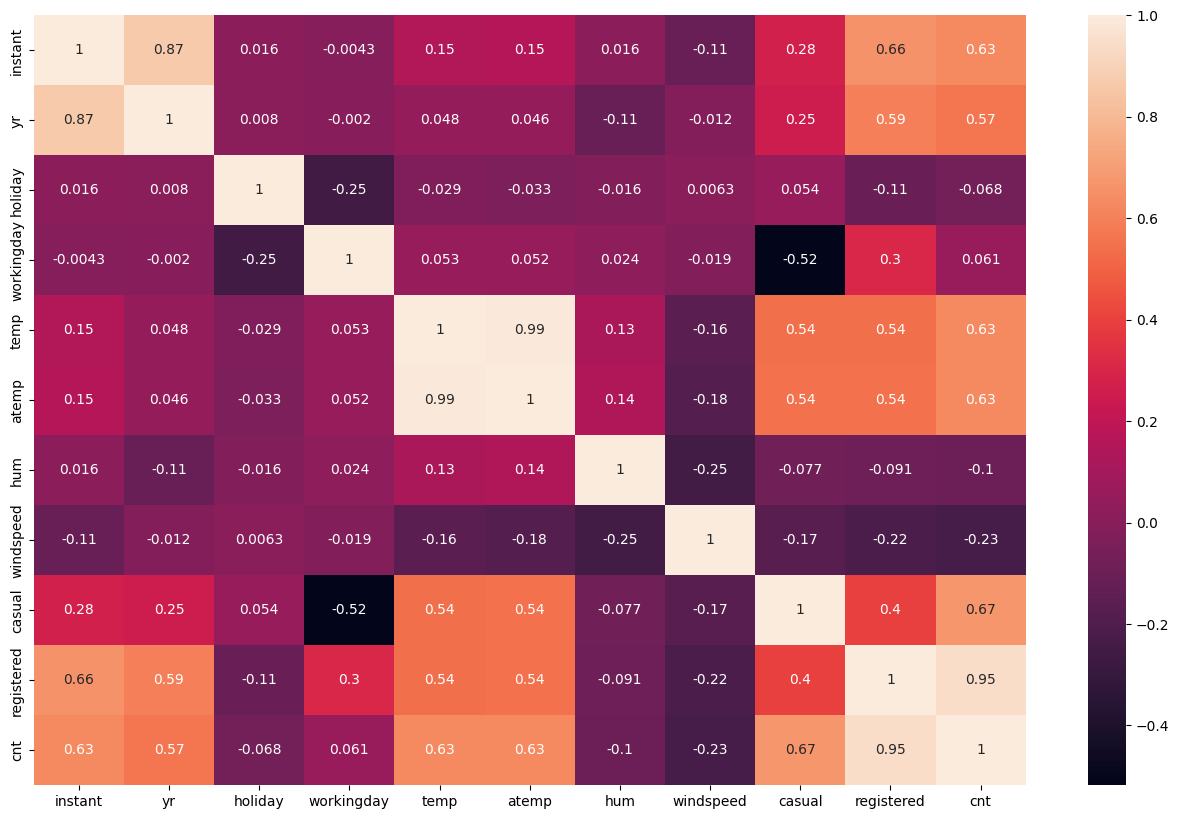

In [108]:
#Heatmap (melihat korelai antar variabel)
plt.figure(figsize=(16, 10))
sns.heatmap(data_day.corr(numeric_only=True), annot=True)

terlihat bahwa jumlah penyewa sepeda berkorelasi positif dengan workingday, temp, atemp casual, dan registered

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Pengaruh Cuaca terhadap terhadap jumlah rata-rata persewaan sepeda? Jika terdapat pengaruh, rata-rata penyewa sepeda menyewa pada cuaca apa?

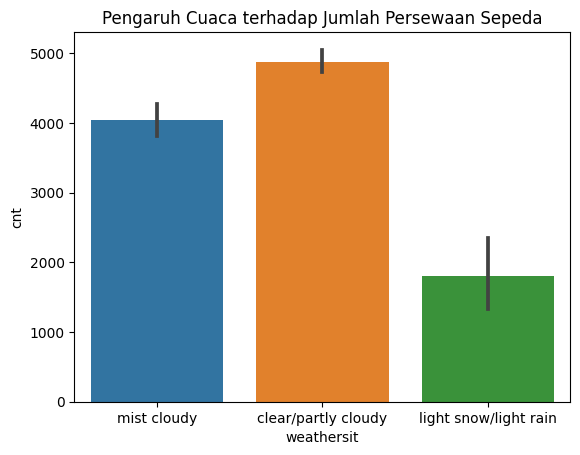

In [110]:
sns.barplot(x='weathersit', y='cnt', data=data_day)
plt.title('Pengaruh Cuaca terhadap Jumlah Persewaan Sepeda')
plt.show()

dari grafik bar plot diatas diketahui bahwa cuaca sangat berpengaruh terhadap penyewa sepeda, jika cuaca dalam keaadaan baik atau cerah, maka konsumen/penyewa sepeda makin banyak. Begitu pula sebaliknya, jika cuaca dalam keadaan ekstrim/mengkhawatirkan maka tidak terdapat konsumen atau penyewa sepeda. Rata-rata penyewa menyewa sepeda pada saat cuaca cerah

### Pertanyaan 2: Rata-Rata Penyewa Sepeda menyewa pada jam berapa?

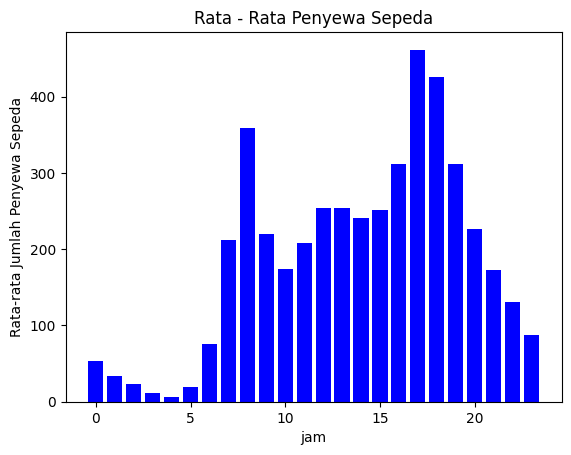

In [114]:
rata_jam = data_hour.groupby('hr')['cnt'].mean()

plt.bar(rata_jam.index, rata_jam.values, color='Blue')

plt.title('Rata - Rata Penyewa Sepeda')
plt.xlabel('jam')
plt.ylabel('Rata-rata Jumlah Penyewa Sepeda')

plt.show()

- dari Jam 0-5 memiliki rata rata persewaan sepeda lebih sedikit dibanding jam lainnya

- Rata-rata penyewa sepeda sering meningkat dari waktu waktu hingga mencapai nilai rata rata sepeda tertinggi pada jam 17. Pada rentang waktu dari 6-17 terjadi naik turun rata rata jumlah yang menyewa sepeda

- Setelah itu rata rata penyewa sepeda semakin turun seiring berjalannnya waktu (rata-rata penyewa sepeda semakin turun saat malam)